<a href="https://colab.research.google.com/github/RafsanJany-44/Thesis_Project/blob/main/ANN_TEST3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Loading Dataset
data = pd.read_csv("/content/drive/MyDrive/Thesis_Data/EEG_HMC_underscore.csv")

In [5]:
X = data.iloc[:, 1:76].values
Y = data.iloc[:, 0].values

In [6]:
#Encoding Categorical the sleep_stage
from sklearn.preprocessing import LabelEncoder
LE1 = LabelEncoder()
Y = np.array(LE1.fit_transform(Y))

In [7]:
#Encoding Categorical variable Geography
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct =ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder="passthrough")
X = np.array(ct.fit_transform(X))

In [8]:
#Splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [9]:
len(X_train)

86760

In [10]:
len(X_test)

21691

In [12]:
X_train.shape


(86760, 215)

In [17]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(215,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
2712/2712 [==============================] - 13s 4ms/step - loss: 1.6858 - accuracy: 0.4180
Epoch 2/100
2712/2712 [==============================] - 5s 2ms/step - loss: 1.2276 - accuracy: 0.5211
Epoch 3/100
2712/2712 [==============================] - 4s 2ms/step - loss: 1.1826 - accuracy: 0.5393
Epoch 4/100
2712/2712 [==============================] - 5s 2ms/step - loss: 1.1568 - accuracy: 0.5505
Epoch 5/100
2712/2712 [==============================] - 4s 2ms/step - loss: 1.1462 - accuracy: 0.5560
Epoch 6/100
2712/2712 [==============================] - 4s 2ms/step - loss: 1.1257 - accuracy: 0.5645
Epoch 7/100
2712/2712 [==============================] - 5s 2ms/step - loss: 1.1268 - accuracy: 0.5647
Epoch 8/100
2712/2712 [==============================] - 5s 2ms/step - loss: 1.1133 - accuracy: 0.5721
Epoch 9/100
2712/2712 [==============================] - 5s 2ms/step - loss: 1.1060 - accuracy: 0.5749
Epoch 10/100
2712/2712 [==============================] - 5s 2ms/step - 

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 603us/step - loss: 7.0543 - accuracy: 0.8796


[7.054320335388184, 0.8795999884605408]

<h4 style = "color:blue">Comparing Accuracy with RF and SVM (with different kernels):</h4>

In [ ]:
from sklearn.ensemble import RandomForestClassifier #ensemble is used if we have to use multiple algorithms 
model_rf = RandomForestClassifier(n_estimators=30) # n_estimators = number of random dicision trees 
model_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30)

In [ ]:
model_rf.score(X_test, y_test)

0.963

In [ ]:
from sklearn.svm import SVC
model_svm = SVC()

In [ ]:
model_svm.fit(X_train, y_train)
model_svm.score(X_test, y_test)

0.9792

In [ ]:
model_svm_poly = SVC(kernel='poly')
model_svm_poly.fit(X_train, y_train)
model_svm_poly.score(X_test, y_test)

KeyboardInterrupt: 

In [ ]:
model_svm_rbf = SVC(kernel='rbf')
model_svm_rbf.fit(X_train, y_train)
model_svm_rbf.score(X_test, y_test)

<h2>Improve NN with scaling the features</h2>

In [ ]:
X_train = X_train / 255
X_test = X_test / 255
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
X_train_flattened_1 = X_train.reshape(len(X_train), 28*28)
X_test_flattened_1 = X_test.reshape(len(X_test), 28*28)
model.fit(X_train_flattened_1, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 956us/step - loss: 1.3318 - accuracy: 0.6877
Epoch 2/5
1875/1875 [==============================] - 2s 912us/step - loss: 0.8537 - accuracy: 0.8729
Epoch 3/5
1875/1875 [==============================] - 2s 919us/step - loss: 0.5943 - accuracy: 0.8877
Epoch 4/5
1875/1875 [==============================] - 2s 935us/step - loss: 0.4372 - accuracy: 0.8994
Epoch 5/5
1875/1875 [==============================] - 2s 918us/step - loss: 0.3505 - accuracy: 0.9082


In [ ]:
model.fit(X_train_flattened_1, y_train, epochs=15)

NameError: ignored

In [ ]:
model.evaluate(X_test_flattened_1, y_test)

NameError: ignored

<h3>Now we try to draw the Confusion matrix</h3>
<p>Here, the NN will predict the test data considering each of the neurons. So, we need to find out the best neuron which is giving us the highest prediction.
    <br> In this case we have to use the argmax() function for those neurons. </p>

In [ ]:
y_predicted = model.predict(X_test_flattened_1)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

NameError: ignored

**Now we need to draw the confusion matrix to show where our model is doing mistakes**
<br>
<br>
***Tensorflow has its own confusion matrix function where "labels" is the truth data and "predictions" is the predicted data***

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[  27,    0,    0,    0,    0,    0,    0,    0,  953,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1135,    0],
       [   1,    0,    0,    0,    0,    0,    0,    0, 1031,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1010,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,  982,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,  892,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,  958,    0],
       [   5,    0,    0,    0,    0,    0,    0,    0, 1023,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,  974,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1009,    0]])>

Text(69.0, 0.5, 'Truth')

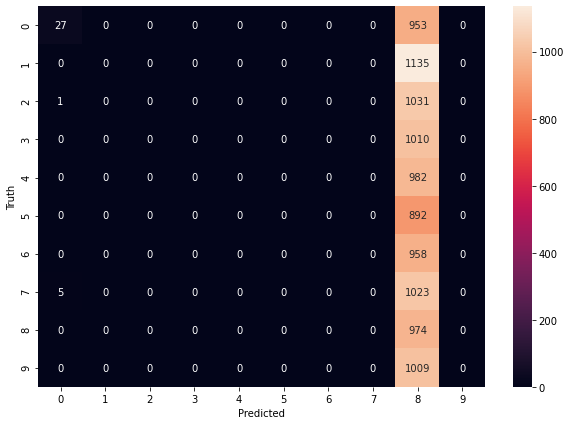

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d') # here, cm is called to be visualized
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3>Add hidden layers in the NN to improve the accuracy</h3>
<p>What we will do here: <br>
    1. The first layer includes the input layer and hidden layer. The number of neurons in the hidden layer is fixed based on some trail and error <br>
    2. The last layer includes the output layer<br>
    3. layers are comma (,) separated
    
<b>Note: When the NN adds hidden layer, it will take more time to be trained</b>

</p>

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'), # input layer
    keras.layers.Dense(10, activation='sigmoid') # output layer
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 717us/step - loss: 2.3340 - accuracy: 0.8416
Epoch 2/5
1875/1875 [==============================] - 1s 718us/step - loss: 0.3981 - accuracy: 0.9038
Epoch 3/5
1875/1875 [==============================] - 1s 713us/step - loss: 0.2918 - accuracy: 0.9255
Epoch 4/5
1875/1875 [==============================] - 1s 715us/step - loss: 0.2495 - accuracy: 0.9352
Epoch 5/5
1875/1875 [==============================] - 1s 726us/step - loss: 0.2309 - accuracy: 0.9398


In [ ]:
model.fit(X_train_flattened, y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 1s 769us/step - loss: 0.2146 - accuracy: 0.9454
Epoch 2/15
1875/1875 [==============================] - 1s 762us/step - loss: 0.2051 - accuracy: 0.9477
Epoch 3/15
1875/1875 [==============================] - 1s 733us/step - loss: 0.1938 - accuracy: 0.9510
Epoch 4/15
1875/1875 [==============================] - 1s 760us/step - loss: 0.1848 - accuracy: 0.9530
Epoch 5/15
1875/1875 [==============================] - 1s 765us/step - loss: 0.1775 - accuracy: 0.9554
Epoch 6/15
1875/1875 [==============================] - 1s 766us/step - loss: 0.1715 - accuracy: 0.9560
Epoch 7/15
1875/1875 [==============================] - 1s 764us/step - loss: 0.1739 - accuracy: 0.9578
Epoch 8/15
1875/1875 [==============================] - 2s 822us/step - loss: 0.1716 - accuracy: 0.9578
Epoch 9/15
1875/1875 [==============================] - 1s 786us/step - loss: 0.1685 - accuracy: 0.9586
Epoch 10/15
1875/1875 [==============================] - 1s 724u

In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 606us/step - loss: 0.2725 - accuracy: 0.9375


[0.272487610578537, 0.9375]

Text(69.0, 0.5, 'Truth')

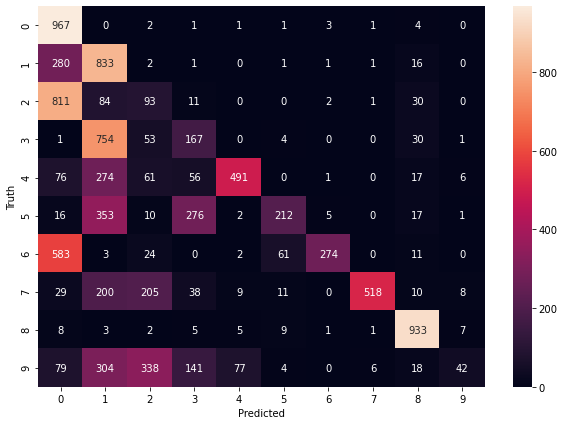

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3>Using Flatten layer so that we don't have to call .reshape function on input dataset</h3>

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # input layer is reshaped and flattened
    keras.layers.Dense(100, activation='relu'), # input layer
    keras.layers.Dense(10, activation='sigmoid') # output layer
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 733us/step - loss: 0.2730 - accuracy: 0.9233
Epoch 2/5
1875/1875 [==============================] - 1s 727us/step - loss: 0.1240 - accuracy: 0.9633
Epoch 3/5
1875/1875 [==============================] - 1s 727us/step - loss: 0.0858 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 1s 726us/step - loss: 0.0655 - accuracy: 0.9794
Epoch 5/5
1875/1875 [==============================] - 1s 777us/step - loss: 0.0517 - accuracy: 0.9837


Text(69.0, 0.5, 'Truth')

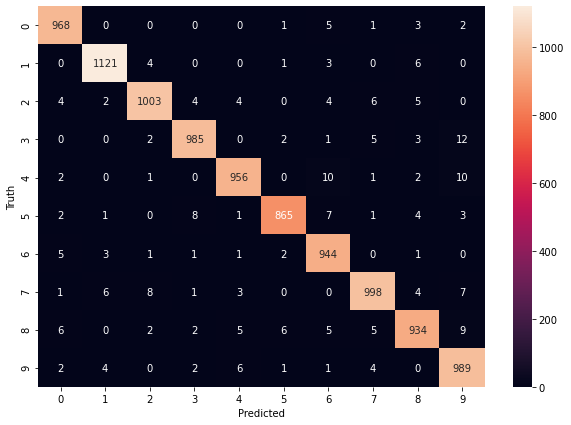

In [ ]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 626us/step - loss: 0.0776 - accuracy: 0.9763


[0.07760973274707794, 0.9763000011444092]